In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
files = [file for file in os.listdir() if file.startswith('results') and file.endswith('.txt')]

df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_csv(file, sep=',')], ignore_index=True)

df.head()

,depth,gap,max_pool,fix,n_samples,accuracy
0,2,True,False,True,1000,0.40
1,2,True,False,False,1000,0.40
2,2,False,True,True,1000,0.08
3,2,False,True,False,1000,0.08
4,2,False,False,True,1000,0.33


In [59]:
# Convert two columns gap max_pool into a unique categorical "gap" and "pool" and if both false "vanilla"
df['gap'] = df['gap'].astype(str)
df['max_pool'] = df['max_pool'].astype(str)
df['type'] = df['gap'] + '_' + df['max_pool']
df['type'] = df['type'].replace({'False_False': 'vanilla', 'True_False': 'gap', 'False_True': 'max', 'True_True': 'issue'})
df = df.drop(columns=['gap', 'max_pool', 'fix'])

df

,depth,n_samples,accuracy,type
0,2,1000,0.40,gap
1,2,1000,0.40,gap
2,2,1000,0.08,max
3,2,1000,0.08,max
4,2,1000,0.33,vanilla
...,...,...,...,...
153,50,500,0.33,gap
154,50,500,0.27,max
155,50,500,0.27,max
156,50,500,0.28,vanilla


In [60]:
df.to_csv('results.csv', index=False)

In [61]:
results = {('CNN', 2, 128, 1000): 0.29695652173913045,
 ('CNN', 5, 128, 1000): 0.1683695652173913,
 ('CNN', 8, 128, 1000): 0.09576086956521739,
 ('CNN', 10, 128, 1000): 0.09576086956521739,
 ('CNN', 15, 128, 1000): 0.09576086956521739,
 ('CNN', 30, 128, 1000): 0.09576086956521739,
 ('CNN', 50, 128, 1000): 0.09576086956521739,

 ('CNN 1000', 2, 128, 500): 0.29695652173913045,
 ('CNN 1000', 5, 128, 500): 0.1683695652173913,
 ('CNN 1000', 8, 128, 500): 0.09576086956521739,
 ('CNN 1000', 10, 128, 500): 0.09576086956521739,
 ('CNN 1000', 15, 128, 500): 0.09576086956521739,
 ('CNN 1000', 30, 128, 500): 0.09576086956521739,
 ('CNN 1000', 50, 128, 500): 0.09576086956521739,

 ('CNN 1000', 2, 128, 200): 0.29695652173913045,
 ('CNN 1000', 5, 128, 200): 0.1683695652173913,
 ('CNN 1000', 8, 128, 200): 0.09576086956521739,
 ('CNN 1000', 10, 128, 200): 0.09576086956521739,
 ('CNN 1000', 15, 128, 200): 0.09576086956521739,
 ('CNN 1000', 30, 128, 200): 0.09576086956521739,
 ('CNN 1000', 50, 128, 200): 0.09576086956521739,

 ('CNN 1000', 2, 128, 250): 0.29695652173913045,
 ('CNN 1000', 5, 128, 250): 0.1683695652173913,
 ('CNN 1000', 8, 128, 250): 0.09576086956521739,
 ('CNN 1000', 10, 128, 200): 0.09576086956521739,
 ('CNN 1000', 15, 128, 250): 0.09576086956521739,
 ('CNN 1000', 30, 128, 250): 0.09576086956521739,
 ('CNN 1000', 50, 128, 250): 0.09576086956521739

}

data = {
    "depth": [],
    "type": [],
    "accuracy": [],
    "n_samples": []
}

for key, value in results.items():
    model, depth, width, n_samples = key
    data["type"].append(model)
    data["depth"].append(depth)
    data["accuracy"].append(value)
    data["n_samples"].append(n_samples)

df2 = pd.DataFrame(data)
df2

,depth,type,accuracy,n_samples
0,2,CNN,0.296957,1000
1,5,CNN,0.168370,1000
2,8,CNN,0.095761,1000
3,10,CNN,0.095761,1000
4,15,CNN,0.095761,1000
5,30,CNN,0.095761,1000
6,50,CNN,0.095761,1000
7,2,CNN 1000,0.296957,500
8,5,CNN 1000,0.168370,500
9,8,CNN 1000,0.095761,500


In [62]:
# COncatenate the two dataframes
df = pd.concat([df, df2], ignore_index=True)

In [63]:
df

,depth,n_samples,accuracy,type
0,2,1000,0.400000,gap
1,2,1000,0.400000,gap
2,2,1000,0.080000,max
3,2,1000,0.080000,max
4,2,1000,0.330000,vanilla
...,...,...,...,...
180,5,250,0.168370,CNN 1000
181,8,250,0.095761,CNN 1000
182,15,250,0.095761,CNN 1000
183,30,250,0.095761,CNN 1000


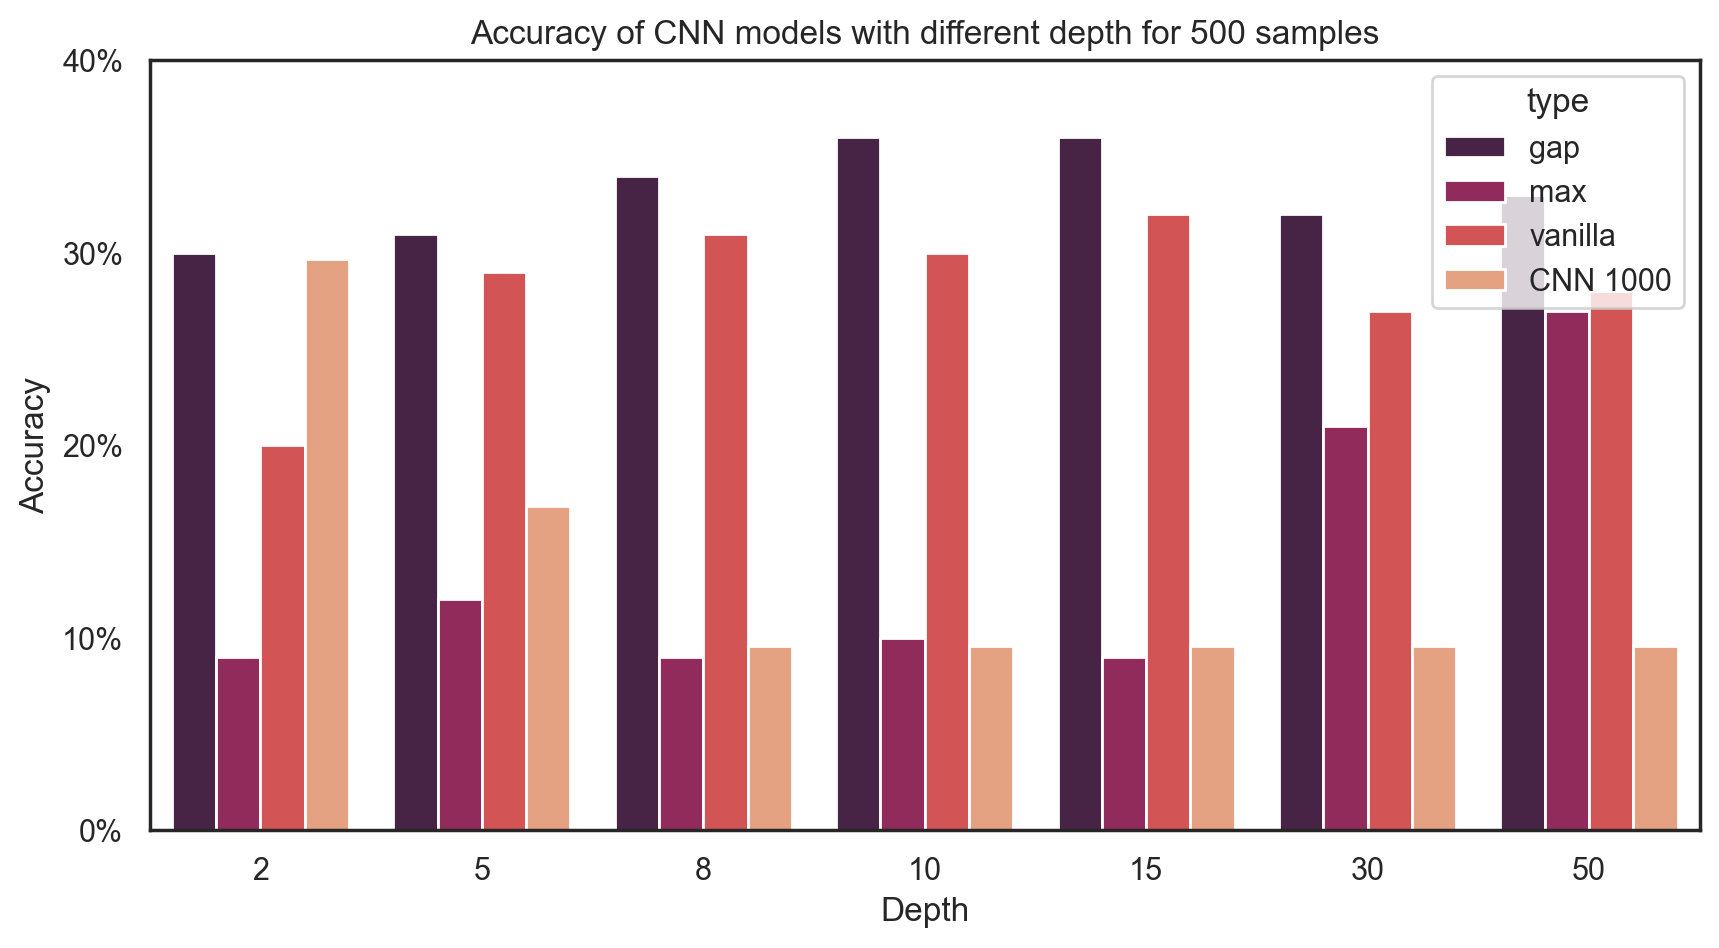

In [74]:
sns.set(style="white")

plt.figure(figsize=(10, 5), dpi=200)

sns.barplot(x='depth', y='accuracy', hue='type', data=df[df["n_samples"] == 500], palette="rocket", ci=None)

# Y ticks to percentage
plt.yticks(np.arange(0, 1.1, 0.1), ['{}%'.format(int(x*100)) for x in np.arange(0, 1.1, 0.1)])
# Add title and labels
plt.title('Accuracy of CNN models with different depth for 500 samples')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 0.4)

plt.savefig('accuracy_bar500.png', dpi=300, transparent=True, bbox_inches='tight')

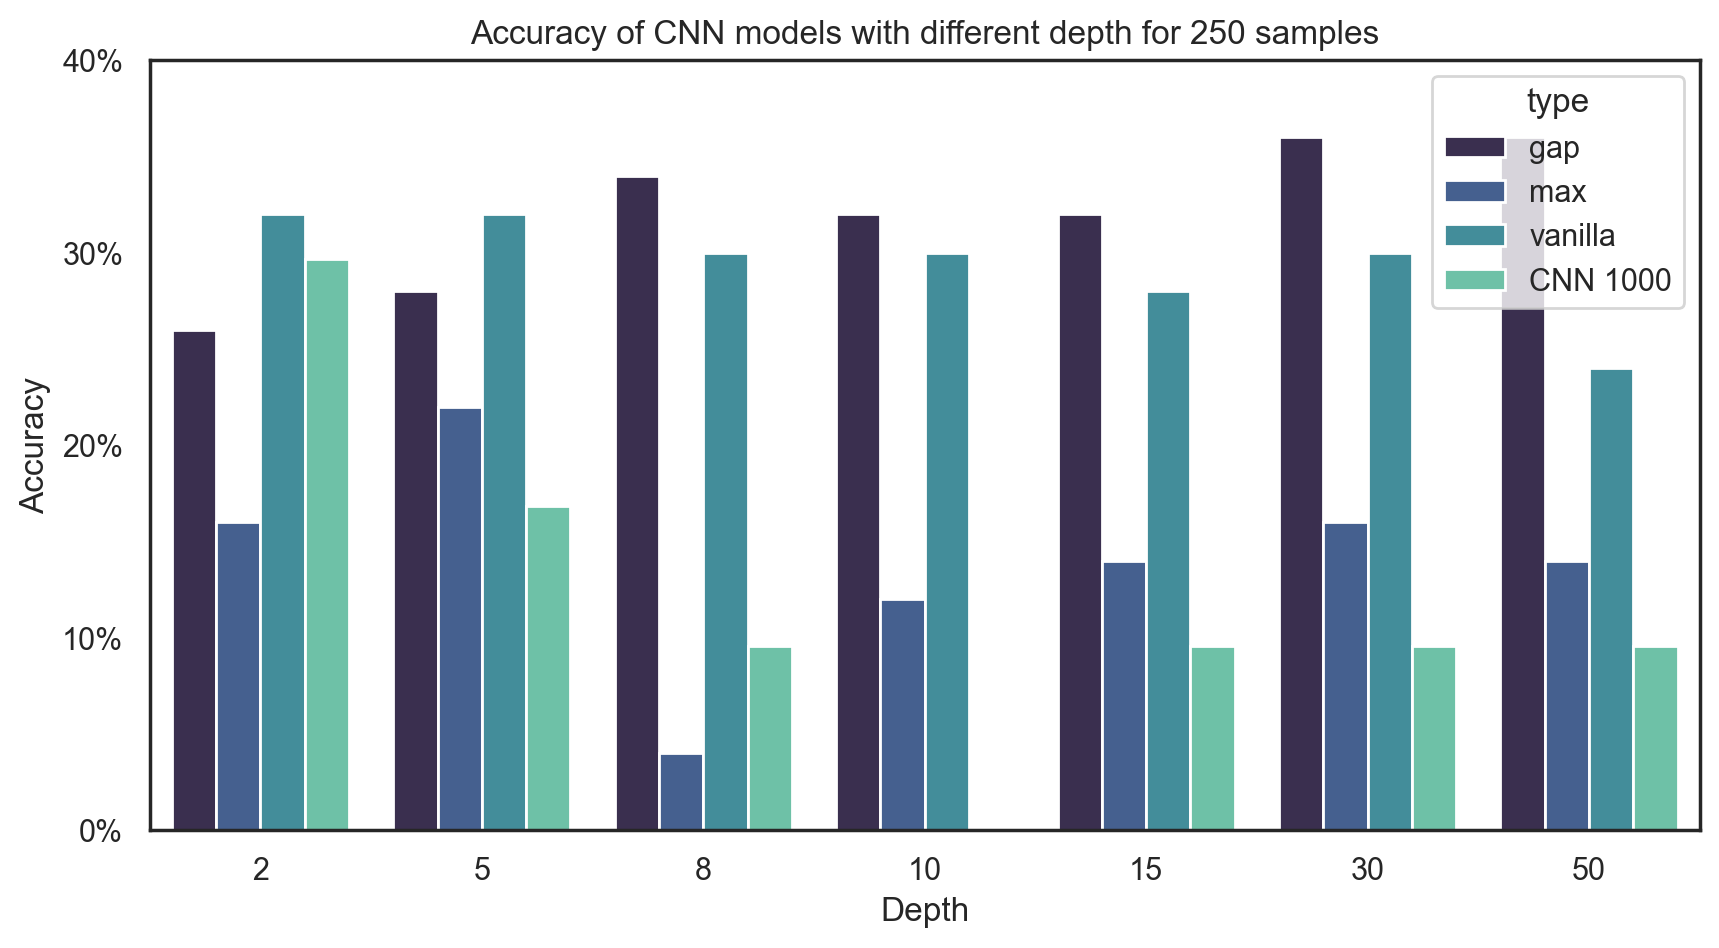

In [73]:
sns.set(style="white")

plt.figure(figsize=(10, 5), dpi=200)

sns.barplot(x='depth', y='accuracy', hue='type', data=df[df["n_samples"] == 250], palette="mako", ci=None)

# Y ticks to percentage
plt.yticks(np.arange(0, 1.1, 0.1), ['{}%'.format(int(x*100)) for x in np.arange(0, 1.1, 0.1)])
# Add title and labels
plt.title('Accuracy of CNN models with different depth for 250 samples')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 0.4)

plt.savefig('accuracy_bar250.png', dpi=300, transparent=True, bbox_inches='tight')

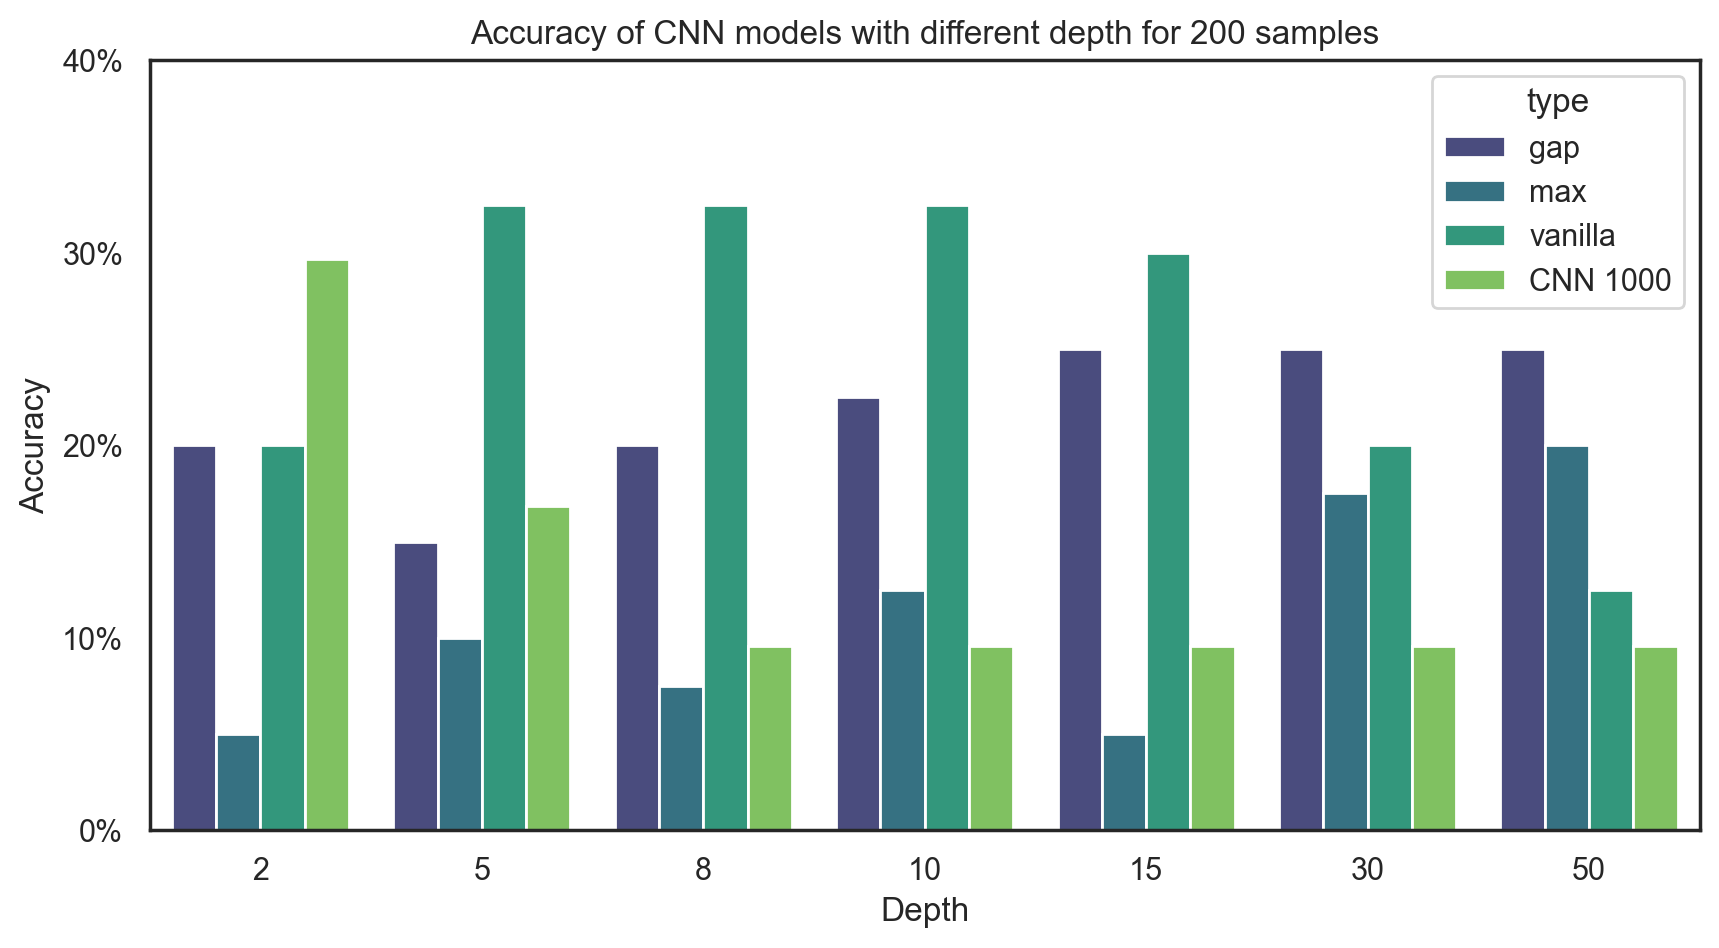

In [75]:
sns.set(style="white")

plt.figure(figsize=(10, 5), dpi=200)

sns.barplot(x='depth', y='accuracy', hue='type', data=df[df["n_samples"] == 200], palette="viridis", ci=None)

# Y ticks to percentage
plt.yticks(np.arange(0, 1.1, 0.1), ['{}%'.format(int(x*100)) for x in np.arange(0, 1.1, 0.1)])
# Add title and labels
plt.title('Accuracy of CNN models with different depth for 200 samples')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 0.4)

plt.savefig('accuracy_bar200.png', dpi=300, transparent=True, bbox_inches='tight')

,depth,n_samples,accuracy,type
0,1,10,0.80,A
1,1,15,0.90,B
2,2,12,0.70,A
3,2,18,0.85,B
4,3,8,0.75,A
5,3,10,0.82,B


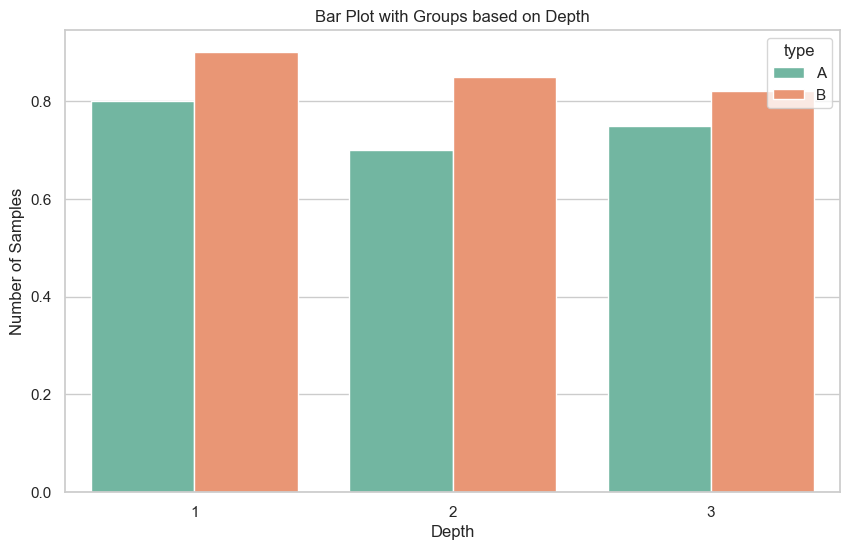

In [25]:
data = {'depth': [1, 1, 2, 2, 3, 3],
        'n_samples': [10, 15, 12, 18, 8, 10],
        'accuracy': [0.8, 0.9, 0.7, 0.85, 0.75, 0.82],
        'type': ['A', 'B', 'A', 'B', 'A', 'B']}

dftest = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='depth', y='accuracy', hue='type', data=dftest, palette="Set2", ci=None)

# Add title and labels
plt.title('Bar Plot with Groups based on Depth')
plt.xlabel('Depth')
plt.ylabel('Number of Samples')

dftest


In [3]:
df["max_pool"]

0      False
1      False
2       True
3       True
4      False
       ...  
153    False
154     True
155     True
156    False
157    False
Name: max_pool, Length: 158, dtype: bool

C:\Users\Antoine\AppData\Local\Temp\ipykernel_30668\252421729.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


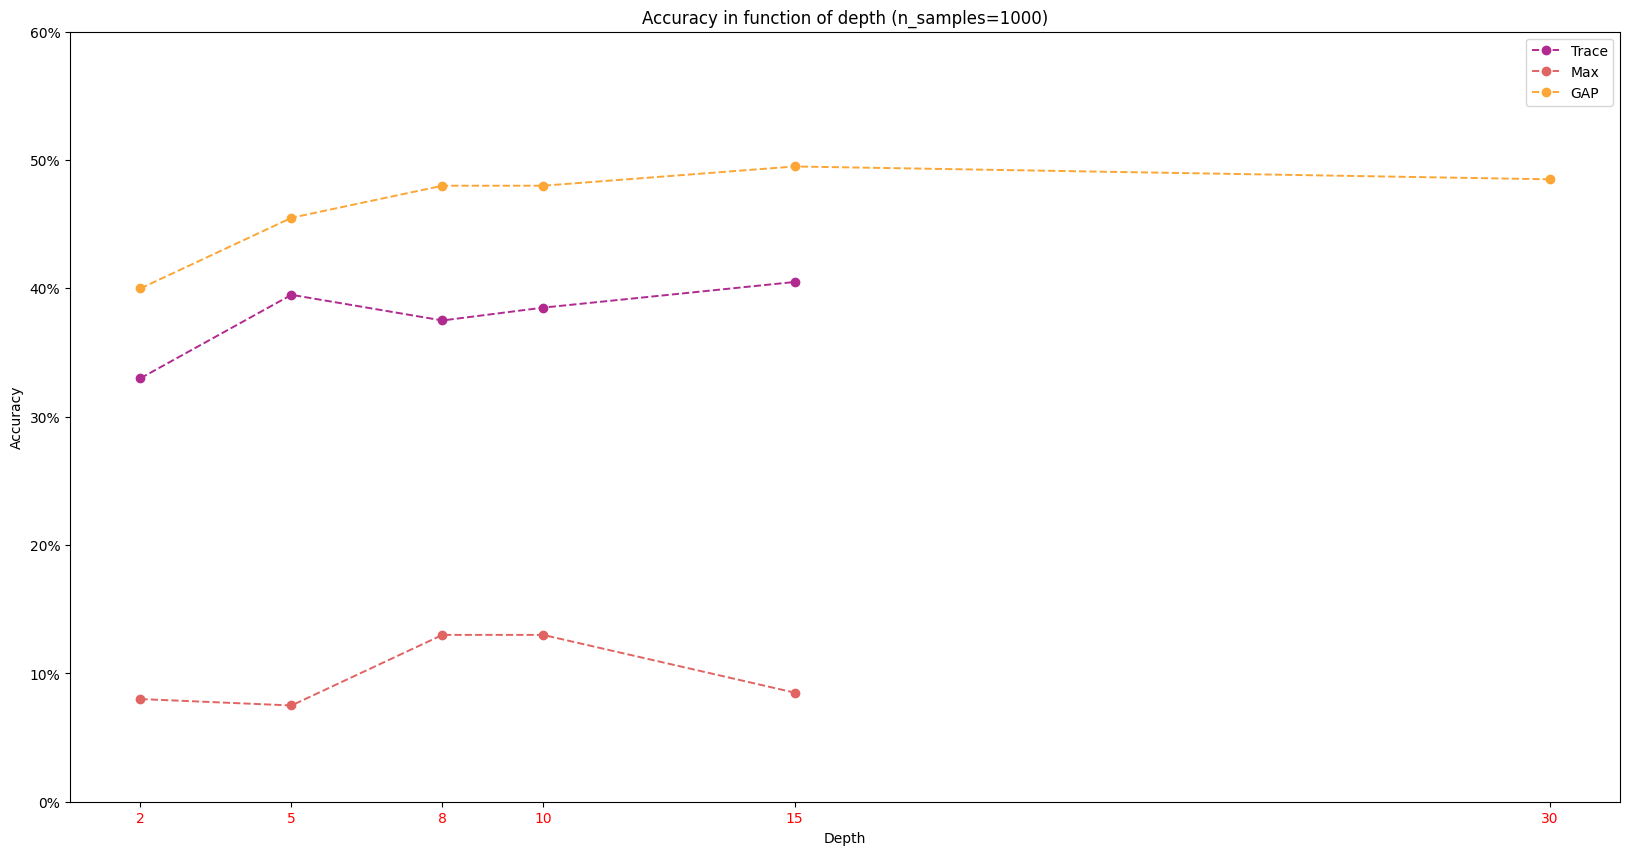

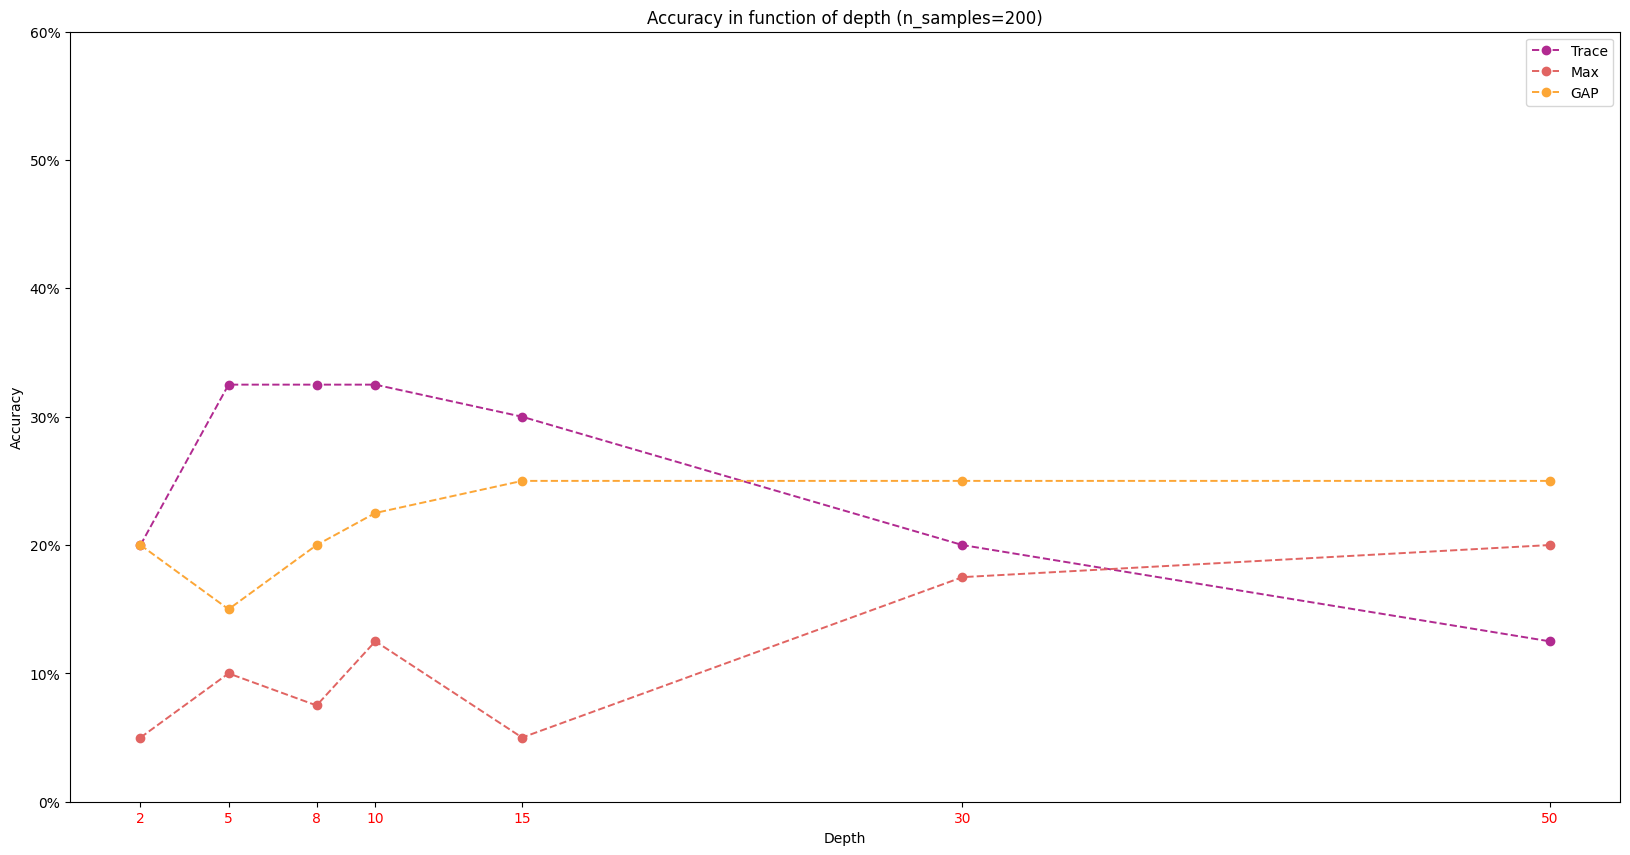

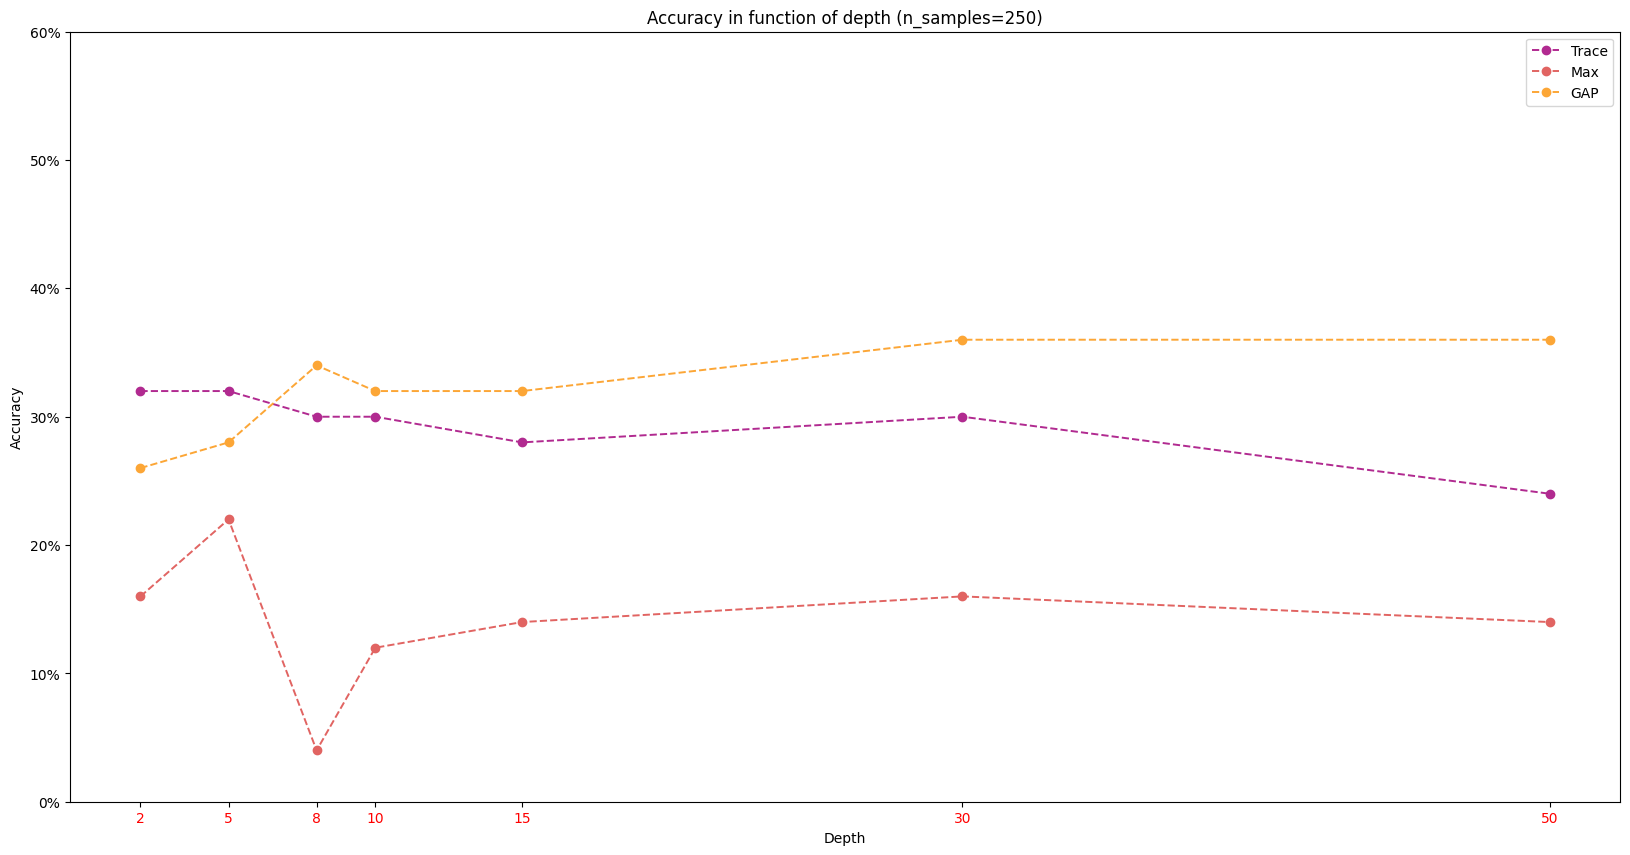

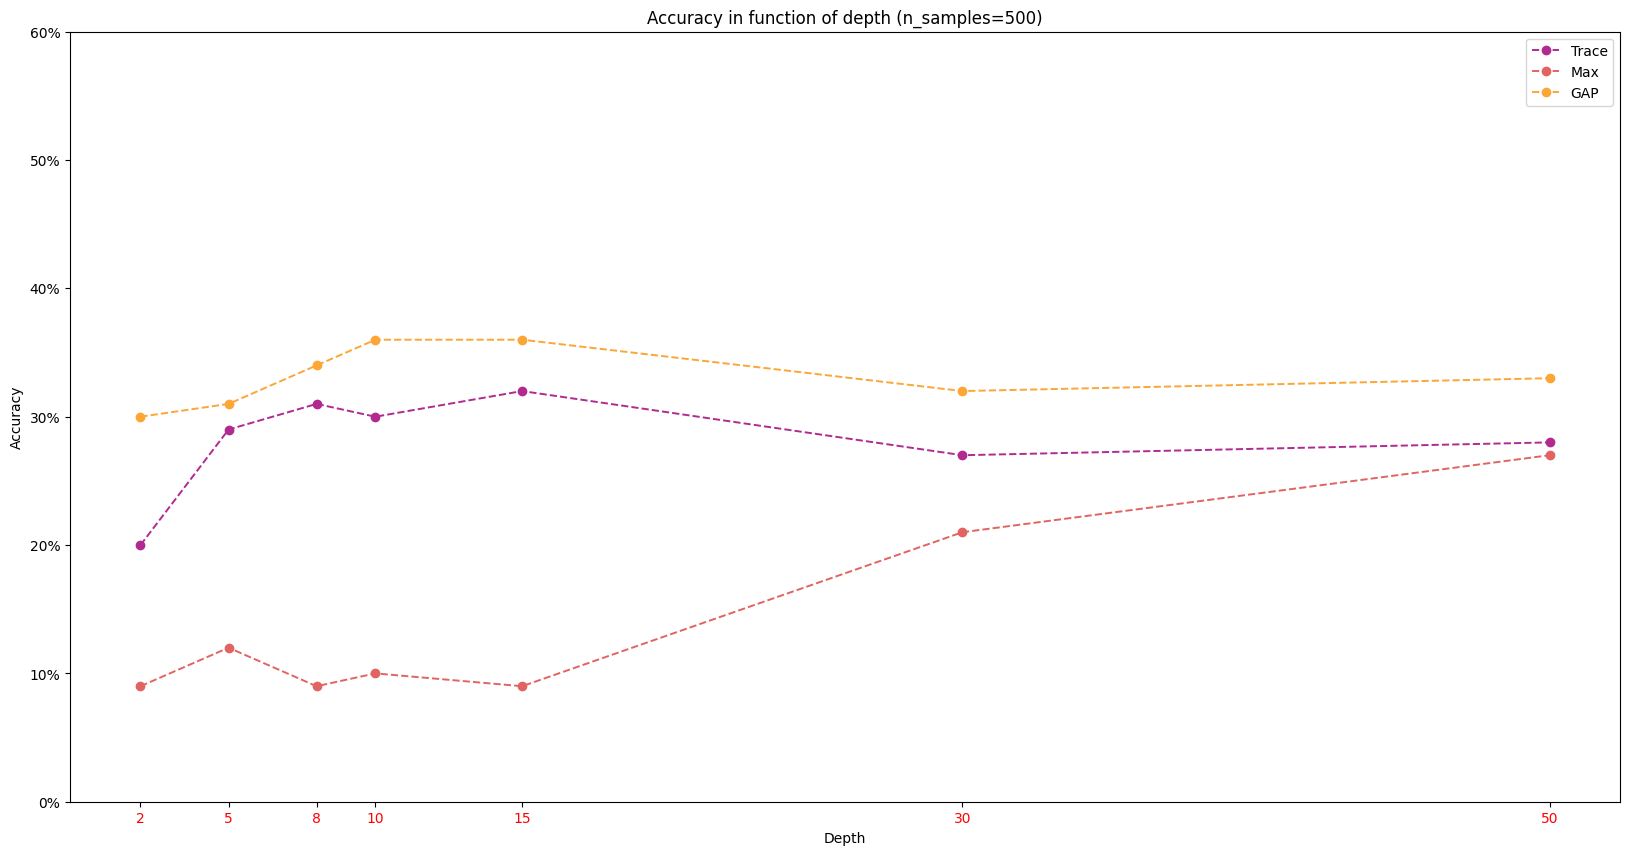

In [8]:
n_samples = df["n_samples"].unique()
depths = df["depth"].unique()

for n in n_samples:
    df_n = df[df["n_samples"] == n]

    plt.figure(figsize=(20, 10))
    colormap = plt.cm.get_cmap("plasma")

    for gap in [False, True]:
        for max_pool in [False, True]:
            if gap and max_pool:
                continue

            if gap: color = colormap(0.8)
            elif max_pool: color = colormap(0.6)
            else: color = colormap(0.4)

            df_exp = df_n[
                (df_n["gap"] == gap)
                & (df_n["max_pool"] == max_pool)
                & (df_n["fix"] == True)
            ]
            plt.plot(
                df_exp["depth"],
                df_exp["accuracy"],
                label=f"{'GAP' if gap else 'Max' if max_pool else 'Trace'}",
                marker="o",
                linestyle="--",
                linewidth=1.4,
                color=color,
            )
    ylim = 0.6
    plt.ylim(0, ylim)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    plt.xlabel("Depth")
    plt.ylabel("Accuracy")
    plt.xticks(df_exp["depth"], color="red")
    plt.title("Accuracy in function of depth (n_samples={})".format(n))
    plt.legend()
    plt.show()

[1000  200  250  500]


C:\Users\Antoine\AppData\Local\Temp\ipykernel_30668\3624078953.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


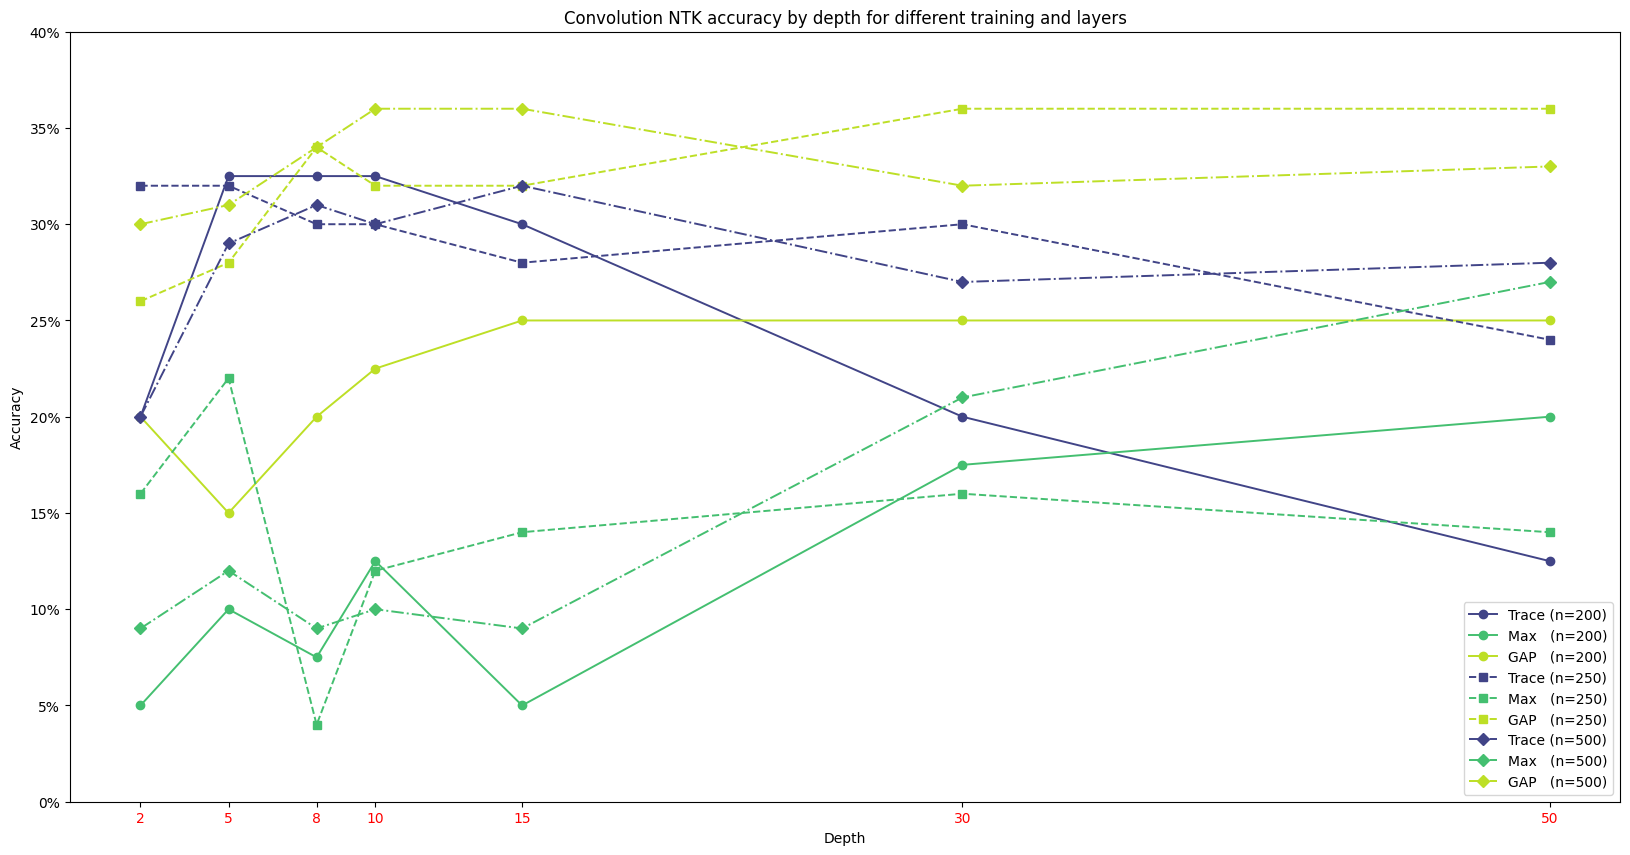

In [35]:
n_samples = df["n_samples"].unique()
depths = df["depth"].unique()

print(n_samples)

plt.figure(figsize=(20, 10))

markers = ["o", "s", "D", "p", "h", "X", "P", "*", "v", "^", "<", ">", "d", "1", "2", "3", "4", "8", "H", "+", "x", "|", "_"]
linestyles = ["solid", "dashed", "dashdot", "dotted"]

colormap = plt.cm.get_cmap("viridis")

for i, n in enumerate(n_samples[1:]):
    df_n = df[df["n_samples"] == n]



    for gap in [False, True]:
        for max_pool in [False, True]:
            if gap and max_pool:
                continue

            if gap:
                color = colormap(0.9)
                label = f"GAP   (n={n})"
            elif max_pool:
                color = colormap(0.7)
                label = f"Max   (n={n})"
            else:
                color = colormap(0.2)
                label = f"Trace (n={n})"

            df_exp = df_n[
                (df_n["gap"] == gap)
                & (df_n["max_pool"] == max_pool)
                & (df_n["fix"] == True)
            ]
            plt.plot(
                df_exp["depth"],
                df_exp["accuracy"],
                label=label,
                marker=markers[i],
                linestyle=linestyles[i],
                linewidth=1.4,
                color=color,
            )
ylim = 0.4
plt.ylim(0, ylim)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.xticks(df_exp["depth"], color="red")
plt.title("Convolution NTK accuracy by depth for different training and layers")
plt.legend()
plt.savefig("conv_ntk_accuracy_by_depth.png", dpi=300, transparent=True)
plt.show()